In [1]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bin import utils

In [2]:
from scipy.stats import entropy

In [3]:
gdata = sc.read_h5ad('RNA/spatial.combined.bin100.h5')
gdata = gdata[:, gdata.var_names.str.startswith('sg')].copy()
gdata = utils.combine_guide_replicates(gdata)
gdata

/home/wpy/stereoseq/20240702-Exclusive/bin/utils.py:78: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


AnnData object with n_obs × n_vars = 11622 × 32
    obs: 'marker'
    obsm: 'spatial'

In [17]:
gdata = gdata[((gdata.obs.marker == 'A') & (gdata.obsm['spatial'][:,1] > 4000)) | ((gdata.obsm['spatial'][:,1] < 6000) & (gdata.obs.marker == 'B'))].copy()
gdata

AnnData object with n_obs × n_vars = 9057 × 32
    obs: 'marker'
    obsm: 'spatial'

/tmp/ipykernel_54284/97752736.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


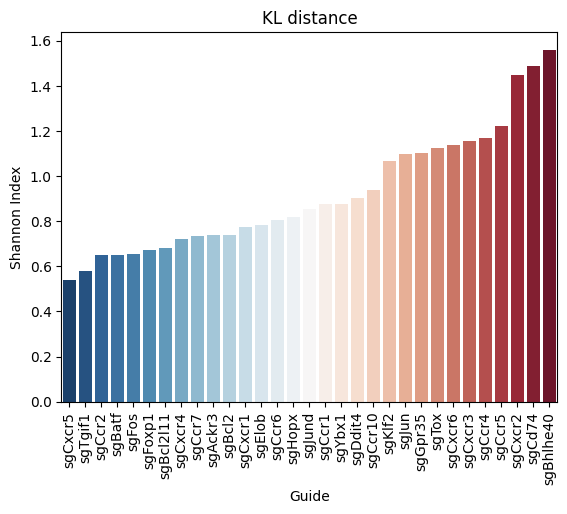

In [5]:
qk_guide = gdata.X.sum(axis=1).flatten() / gdata.X.sum()
entro = {}
for guide in gdata.var_names:
    if guide != 'sgNon-targeting':
        pk_guide = gdata[:, guide].X.flatten() / gdata[:, guide].X.sum()
        entro[guide] = entropy(pk_guide, qk_guide)

df = pd.DataFrame(entro, index=['Shannon']).T.sort_values(by='Shannon')
df.reset_index(inplace=True)
sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')
plt.xticks(rotation=90)
plt.ylabel('Shannon Index')
plt.title('KL distance')
plt.xlabel('Guide')
plt.show()

In [4]:
gdata = sc.read_h5ad('../20240502-SPACseq/RNA/Multitime.filtered.guide.bin100.h5')
gdata = utils.combine_guide_replicates(gdata)

/home/wpy/stereoseq/20240702-Exclusive/bin/utils.py:78: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [5]:
qk_guide = gdata.X.sum(axis=1).flatten() / gdata.X.sum()
for guide in gdata.var_names:
    pk_guide = gdata[:, guide].X.flatten() / gdata[:, guide].X.sum()
    print(guide, entropy(pk_guide, qk_guide))

sgAdrb2 2.246802760826268
sgAqp3 2.4926031359450627
sgArntl 3.344203397882803
sgCd44 3.7241402515798283
sgCd52 2.4161503205454165
sgCxcl16 2.0950430923838597
sgDdit3 2.1559231276467625
sgErgic2 2.8393242238371084
sgFbxo7 2.6323901178159597
sgFlot1 2.3529295400419348
sgGata3 1.0451630731302992
sgGlb1l2 2.657772288361255
sgGpa33 2.32417640711905
sgIkbip 2.724986756735653
sgKcna3 3.419198236486606
sgKlrd1 2.604663787406065
sgL3mbtl3 2.873185302366327
sgMark3 2.325106735909247
sgMcoln1 2.7624661034925935
sgNmb 3.6100047008234637
sgPiezo1 3.1907782551279182
sgPomt1 4.565046673633376
sgPpia 2.5601730361342177
sgS100a11 3.095119619143366
sgScamp4 2.540661213260767
sgSlc39a8 3.5251517609457643
sgSorl1 2.578734270639388
sgSrgn 3.5691252045806308
sgTmem64 2.392928867396589
sgWipf1 2.792576464642709
sgZc3h12a 1.0254095419065024
sgZhx2 1.7333556652321942
sgZscan12 2.7716305416343077
sgnon-targeting 1.1714316906827593


In [49]:
gdata = sc.read_h5ad('../20240502-SPACseq/RNA/Multitime.guide.h5')
gdata.X.sum()

1613332

In [13]:
gdata = sc.read_h5ad('../20240502-SPACseq/RNA/Multitime.filtered.guide.bin100.h5')
gdata = gdata[gdata.obs['marker'] == 'B926-1'].copy()
gdata = utils.combine_guide_replicates(gdata)

/home/wpy/stereoseq/20240702-Exclusive/bin/utils.py:78: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [5]:
index_list = {}

In [14]:
gdata.var_names

Index(['sgAdrb2', 'sgAqp3', 'sgArntl', 'sgCd44', 'sgCd52', 'sgCxcl16',
       'sgDdit3', 'sgErgic2', 'sgFbxo7', 'sgFlot1', 'sgGata3', 'sgGlb1l2',
       'sgGpa33', 'sgIkbip', 'sgKcna3', 'sgKlrd1', 'sgL3mbtl3', 'sgMark3',
       'sgMcoln1', 'sgNmb', 'sgPiezo1', 'sgPomt1', 'sgPpia', 'sgS100a11',
       'sgScamp4', 'sgSlc39a8', 'sgSorl1', 'sgSrgn', 'sgTmem64', 'sgWipf1',
       'sgZc3h12a', 'sgZhx2', 'sgZscan12', 'sgnon-targeting'],
      dtype='object')

In [80]:
# perform kde
import statsmodels.api as sm
plot_data = gdata

kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                             plot_data.obsm['spatial'][:, 1],
                                             plot_data[:, 'sgCd44'].X.flatten()],
                      var_type='ccc',
                      bw='normal_reference')

c_line = np.linspace(plot_data[:, 'sgCd44'].X.min(), plot_data[:, 'sgCd44'].X.max(), 3)
x_grid, y_grid, c_grid = np.meshgrid(np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 50),
                                     np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 50),
                                     c_line)

grid_coords = np.column_stack([x_grid.ravel(), y_grid.ravel(), c_grid.ravel()])
guide_values = kde.pdf(grid_coords).reshape(x_grid.shape)
guide_values = (guide_values[:, :, 0] * c_line[0] + guide_values[:, :, 1] * c_line[1] + guide_values[:, :, 2] * c_line[2]) /\
(guide_values[:, :, 0] + guide_values[:, :, 1] + guide_values[:, :, 2])

kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                             plot_data.obsm['spatial'][:, 1],
                                             plot_data[:, 'sgnon-targeting'].X.flatten()],
                      var_type='ccc',
                      bw='normal_reference')

c_line = np.linspace(plot_data[:, 'sgnon-targeting'].X.min(), plot_data[:, 'sgnon-targeting'].X.max(), 3)
x_grid, y_grid, c_grid = np.meshgrid(np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 50),
                             np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 50),
                             c_line)

grid_coords = np.column_stack([x_grid.ravel(), y_grid.ravel(), c_grid.ravel()])
ntc_values = kde.pdf(grid_coords).reshape(x_grid.shape)
ntc_values = (ntc_values[:, :, 0] * c_line[0] + ntc_values[:, :, 1] * c_line[1] + ntc_values[:, :, 2] * c_line[2]) /\
(ntc_values[:, :, 0] + ntc_values[:, :, 1] + ntc_values[:, :, 2])

guide_df = pd.DataFrame({
    'x': x_grid[:, :, 0].flatten(),
    'y': y_grid[:, :, 0].flatten(),
    'kde': guide_values.flatten() / guide_values.flatten().sum()
})

ntc_df = pd.DataFrame({
    'x': x_grid[:, :, 0].flatten(),
    'y': y_grid[:, :, 0].flatten(),
    'kde': ntc_values.flatten() / ntc_values.flatten().sum()
})

entropy(guide_df.kde, ntc_df.kde)

0.1946002874826907

In [4]:
# perform kde
import statsmodels.api as sm
from tqdm import tqdm
plot_data = gdata

kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                             plot_data.obsm['spatial'][:, 1],
                                             plot_data[:, 'sgnon-targeting'].X.flatten()],
                      var_type='ccc',
                      bw='normal_reference')

c_line = np.linspace(plot_data[:, 'sgnon-targeting'].X.min(), plot_data[:, 'sgnon-targeting'].X.max(), 3)
x_grid, y_grid, c_grid = np.meshgrid(np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 200),
                             np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 200),
                             c_line)

grid_coords = np.column_stack([x_grid.ravel(), y_grid.ravel(), c_grid.ravel()])
ntc_values = kde.pdf(grid_coords).reshape(x_grid.shape)
ntc_values = (ntc_values[:, :, 0] * c_line[0] + ntc_values[:, :, 1] * c_line[1] + ntc_values[:, :, 2] * c_line[2]) /\
(ntc_values[:, :, 0] + ntc_values[:, :, 1] + ntc_values[:, :, 2])

ntc_df = pd.DataFrame({
    'x': x_grid[:, :, 0].flatten(),
    'y': y_grid[:, :, 0].flatten(),
    'kde': ntc_values.flatten() / ntc_values.flatten().sum()
})
from multiprocessing import Pool

def calculate_entropy(guide_name):
    kde = sm.nonparametric.KDEMultivariate(data=[plot_data.obsm['spatial'][:, 0],
                                                    plot_data.obsm['spatial'][:, 1],
                                                    plot_data[:, guide_name].X.flatten()],
                                            var_type='ccc',
                                            bw='normal_reference')

    c_line = np.linspace(plot_data[:, guide_name].X.min(), plot_data[:, guide_name].X.max(), 3)
    x_grid, y_grid, c_grid = np.meshgrid(np.linspace(plot_data.obsm['spatial'][:, 0].min(), plot_data.obsm['spatial'][:, 0].max(), 200),
                                            np.linspace(plot_data.obsm['spatial'][:, 1].min(), plot_data.obsm['spatial'][:, 1].max(), 200),
                                            c_line)

    grid_coords = np.column_stack([x_grid.ravel(), y_grid.ravel(), c_grid.ravel()])
    guide_values = kde.pdf(grid_coords).reshape(x_grid.shape)
    guide_values = (guide_values[:, :, 0] * c_line[0] + guide_values[:, :, 1] * c_line[1] + guide_values[:, :, 2] * c_line[2]) /\
                    (guide_values[:, :, 0] + guide_values[:, :, 1] + guide_values[:, :, 2])

    guide_df = pd.DataFrame({
        'x': x_grid[:, :, 0].flatten(),
        'y': y_grid[:, :, 0].flatten(),
        'kde': guide_values.flatten() / guide_values.flatten().sum()
    })
    return guide_name, entropy(guide_df.kde, ntc_df.kde)

with Pool(processes=34) as pool:  # 设置同时并行34个线程
    results = pool.map(calculate_entropy, gdata.var_names)

entro_dist = {name: entropy for name, entropy in results if name is not None}

/tmp/ipykernel_60785/50641068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


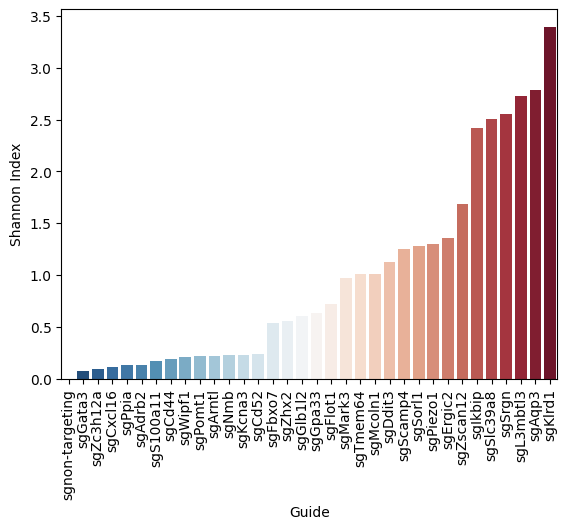

In [5]:
df = pd.DataFrame(entro_dist, index=['Shannon']).T.sort_values(by='Shannon')
# df.Shannon = -np.log10(df.Shannon)
df.reset_index(inplace=True)
sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')
plt.xticks(rotation=90)
plt.ylabel('Shannon Index')
# plt.title('KL distance-Count > 500')
plt.xlabel('Guide')
plt.show()

/tmp/ipykernel_34810/4136404918.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


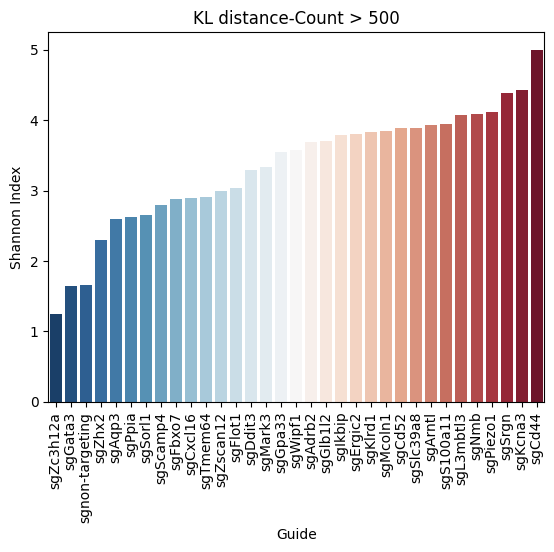

In [15]:
qk_guide = gdata.X.sum(axis=1).flatten() / gdata.X.sum()
# qk_guide = gdata[:, 'sgNTC'].X.flatten() / gdata[:, 'sgNTC'].X.sum()
entro = {}
for guide in gdata.var_names:
    if guide != 'sgPomt1':
        pk_guide = gdata[:, guide].X.flatten() / gdata[:, guide].X.sum()
        entro[guide] = entropy(pk_guide, qk_guide)

df = pd.DataFrame(entro, index=['Shannon']).T.sort_values(by='Shannon')
df.reset_index(inplace=True)
sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')
plt.xticks(rotation=90)
plt.ylabel('Shannon Index')
plt.title('KL distance-Count > 500')
plt.xlabel('Guide')
plt.show()

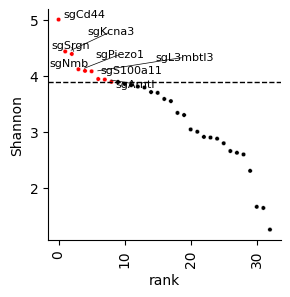

In [22]:
import seaborn as sns

p_df = pd.DataFrame(entro.values(), index=entro.keys())
p_df.sort_values(by=0, ascending=False, inplace=True)
p_df = p_df[p_df.index != 'sgPomt1']
p_df['Shannon'] = p_df[0]
p_df['rank'] = np.arange(len(p_df))
p_df['sig'] = p_df['rank'].map(lambda x: 'yes' if x <= np.quantile(p_df['rank'], 0.25) else 'no')

plt.figure(figsize=(3, 3))
sns.scatterplot(x='rank', y='Shannon', data=p_df, color='black', s=10, hue='sig', palette=['red', 'black'], legend=False)
plt.axhline(y=p_df['Shannon'].quantile(0.75), color='black', linewidth=1, linestyle='--', alpha=1)
# plt.title('PERMANOVA between clusters-Count')
texts = []
for i, row in p_df.iterrows():
    if row['rank'] < 8:
        texts.append(plt.text(row['rank'] + 0.5, row['Shannon'], i, fontsize=8, alpha=1, ha='left', va='bottom', rotation=0))
import adjustText as aT
aT.adjust_text(texts=texts, expand_points=(1.5, 1.5), expand_text=(1.5, 1.5), ax=plt.gca(), arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
# plt.xlabel('Guide')
plt.xticks(rotation=90)
# plt.ylabel('Shannon Index')
sns.despine()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('../20240502-SPACseq/plots/T_shannon_guide.pdf', bbox_inches='tight', format='pdf')
plt.show()

/tmp/ipykernel_20191/4099160913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


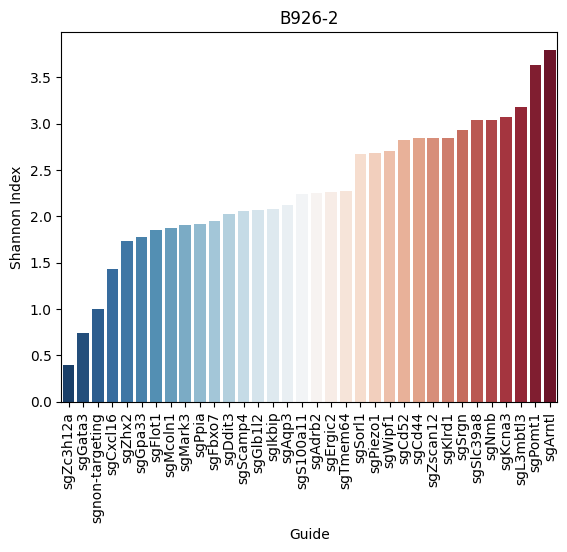

/tmp/ipykernel_20191/4099160913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


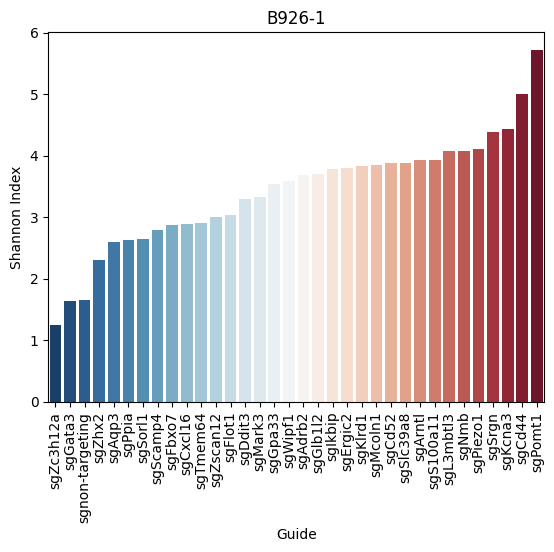

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/views.py:144: RuntimeWarning: invalid value encountered in divide
  results = super().__array_ufunc__(
/tmp/ipykernel_20191/4099160913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


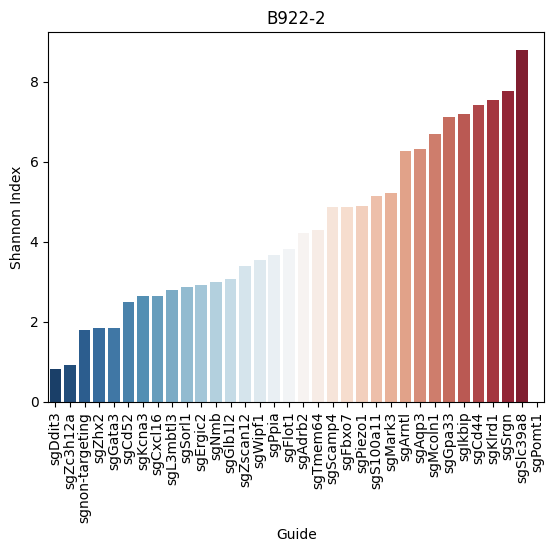

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/views.py:144: RuntimeWarning: invalid value encountered in divide
  results = super().__array_ufunc__(
/tmp/ipykernel_20191/4099160913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


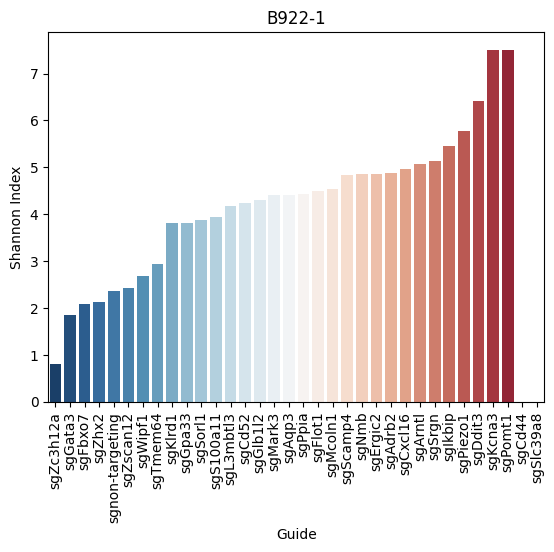

/tmp/ipykernel_20191/4099160913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


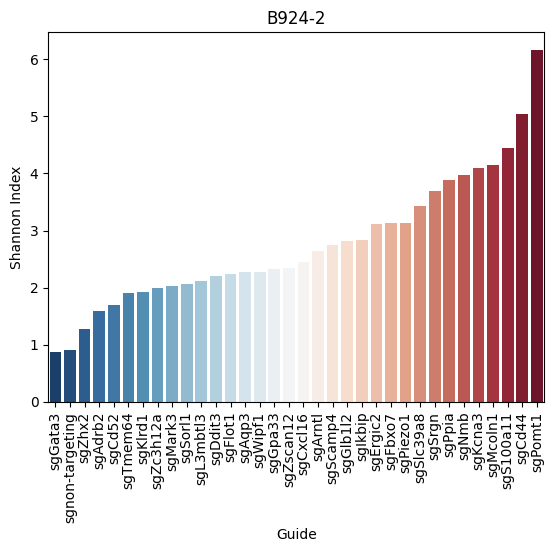

/tmp/ipykernel_20191/4099160913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')


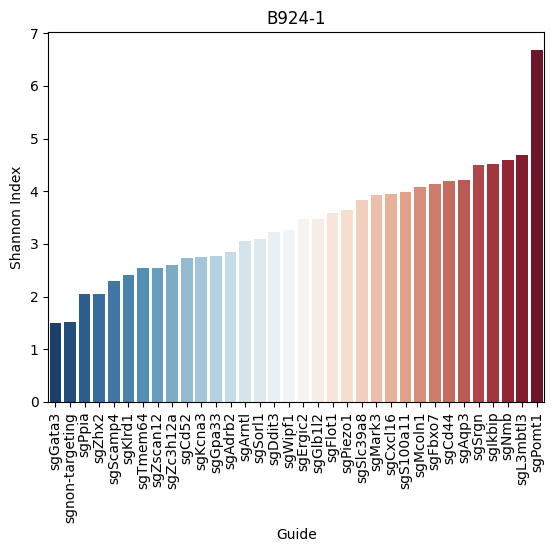

In [10]:
for marker in gdata.obs.marker.unique():
    gdata_ = gdata[gdata.obs.marker == marker].copy()
    qk_guide = gdata_.X.sum(axis=1).flatten() / gdata.X.sum()
    entro = {}
    for guide in gdata_.var_names:
        pk_guide = gdata_[:, guide].X.flatten() / gdata_[:, guide].X.sum()
        entro[guide] = entropy(pk_guide, qk_guide)

    df = pd.DataFrame(entro, index=['Shannon']).T.sort_values(by='Shannon')
    index_list[marker] = df.index.tolist()
    df.reset_index(inplace=True)
    sns.barplot(df, x='index', y='Shannon', palette='RdBu_r')
    plt.xticks(rotation=90)
    plt.ylabel('Shannon Index')
    plt.title(marker)
    plt.xlabel('Guide')
    plt.show()

In [12]:
print(index_list)

{'B926-2': ['sgZc3h12a', 'sgGata3', 'sgnon-targeting', 'sgCxcl16', 'sgZhx2', 'sgGpa33', 'sgFlot1', 'sgMcoln1', 'sgMark3', 'sgPpia', 'sgFbxo7', 'sgDdit3', 'sgScamp4', 'sgGlb1l2', 'sgIkbip', 'sgAqp3', 'sgS100a11', 'sgAdrb2', 'sgErgic2', 'sgTmem64', 'sgSorl1', 'sgPiezo1', 'sgWipf1', 'sgCd52', 'sgCd44', 'sgZscan12', 'sgKlrd1', 'sgSrgn', 'sgSlc39a8', 'sgNmb', 'sgKcna3', 'sgL3mbtl3', 'sgPomt1', 'sgArntl'], 'B926-1': ['sgZc3h12a', 'sgGata3', 'sgnon-targeting', 'sgZhx2', 'sgAqp3', 'sgPpia', 'sgSorl1', 'sgScamp4', 'sgFbxo7', 'sgCxcl16', 'sgTmem64', 'sgZscan12', 'sgFlot1', 'sgDdit3', 'sgMark3', 'sgGpa33', 'sgWipf1', 'sgAdrb2', 'sgGlb1l2', 'sgIkbip', 'sgErgic2', 'sgKlrd1', 'sgMcoln1', 'sgCd52', 'sgSlc39a8', 'sgArntl', 'sgS100a11', 'sgL3mbtl3', 'sgNmb', 'sgPiezo1', 'sgSrgn', 'sgKcna3', 'sgCd44', 'sgPomt1'], 'B922-2': ['sgDdit3', 'sgZc3h12a', 'sgnon-targeting', 'sgZhx2', 'sgGata3', 'sgCd52', 'sgKcna3', 'sgCxcl16', 'sgL3mbtl3', 'sgSorl1', 'sgErgic2', 'sgNmb', 'sgGlb1l2', 'sgZscan12', 'sgWipf1', 'sgP

In [54]:
import numpy as np

def shannon_index(species_counts):
    species_counts = np.array(species_counts)
    total_count = np.sum(species_counts)
    proportions = species_counts / total_count

    proportions = proportions[proportions > 0]
    shannon_index = -np.sum(proportions * np.log(proportions))
    return shannon_index

gdata.obs['shannon'] = np.apply_along_axis(shannon_index, 1, gdata.X)

/tmp/ipykernel_63235/4245717613.py:6: RuntimeWarning: invalid value encountered in divide
  proportions = species_counts / total_count


Text(0.5, 1.0, 'KDE of Non-targeting')

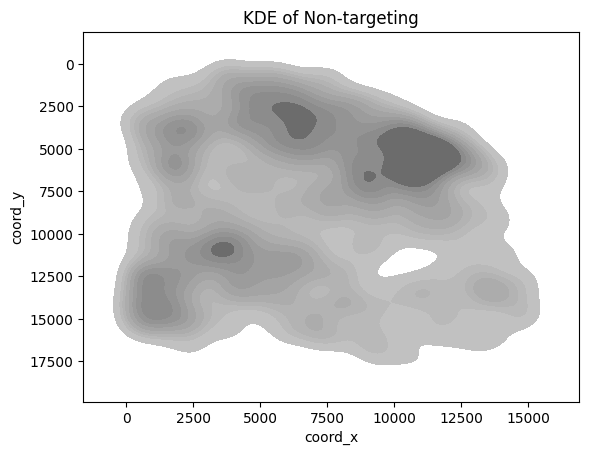

In [26]:
gdata_ = gdata[gdata.obs.marker == 'B926-1']
gdata_ = gdata_[gdata_[:, 'sgnon-targeting'].X > 0]
s_df = pd.DataFrame({
    'coord_x': gdata_.obsm['spatial'][:, 0],
    'coord_y': gdata_.obsm['spatial'][:, 1],
    'hue': [1] * gdata_.shape[0]
})

fig, ax = plt.subplots(1, 1)
# sq.pl.spatial_scatter(gdata_, color='shannon', shape=None, size=0, library_id='spatial', ax=ax)
sns.kdeplot(s_df, x='coord_x', y='coord_y', fill=True, bw_adjust=0.5, ax=ax, alpha=1, hue='hue', palette='Greys', legend=False)
plt.gca().invert_yaxis()
plt.title('KDE of Non-targeting')

Text(0.5, 1.0, 'KDE of sgZc3h12a')

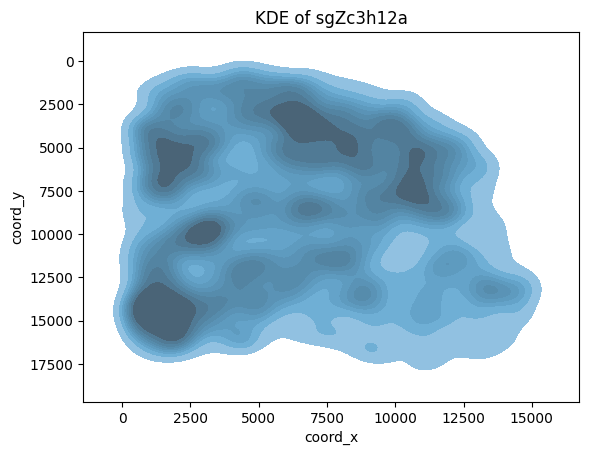

In [29]:
gdata_ = gdata[gdata.obs.marker == 'B926-1']
gdata_ = gdata_[gdata_[:, 'sgZc3h12a'].X > 0]
s_df = pd.DataFrame({
    'coord_x': gdata_.obsm['spatial'][:, 0],
    'coord_y': gdata_.obsm['spatial'][:, 1],
    'hue': [1] * gdata_.shape[0]
})

fig, ax = plt.subplots(1, 1)
# sq.pl.spatial_scatter(gdata_, color='shannon', shape=None, size=0, library_id='spatial', ax=ax)
sns.kdeplot(s_df, x='coord_x', y='coord_y', fill=True, bw_adjust=0.5, ax=ax, alpha=1, hue='hue', palette='Blues', legend=False)
plt.gca().invert_yaxis()
plt.title('KDE of sgZc3h12a')

Text(0.5, 1.0, 'KDE of sgCd44')

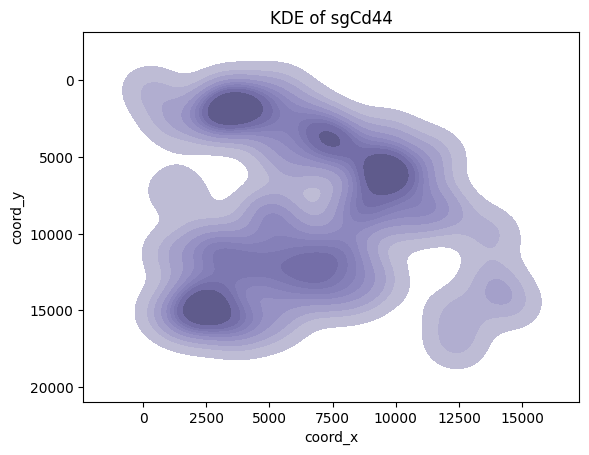

In [23]:
gdata_ = gdata[gdata.obs.marker == 'B926-1']
gdata_ = gdata_[gdata_[:, 'sgCd44'].X > 0]
s_df = pd.DataFrame({
    'coord_x': gdata_.obsm['spatial'][:, 0],
    'coord_y': gdata_.obsm['spatial'][:, 1],
    'hue': [1] * gdata_.shape[0]
})

fig, ax = plt.subplots(1, 1)
# sq.pl.spatial_scatter(gdata_, color='shannon', shape=None, size=0, library_id='spatial', ax=ax)
sns.kdeplot(s_df, x='coord_x', y='coord_y', fill=True, bw_adjust=0.5, ax=ax, alpha=1, hue='hue', palette='Purples', legend=False)
plt.gca().invert_yaxis()
plt.title('KDE of sgCd44')

<Axes: xlabel='coord_x', ylabel='coord_y'>

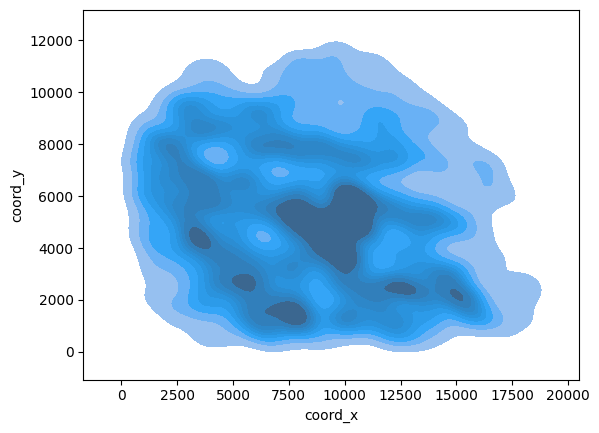

In [70]:
s_df = pd.DataFrame({
    'coord_x': gdata.obsm['spatial'][:, 0],
    'coord_y': gdata.obsm['spatial'][:, 1],
    'shannon': gdata.obs['shannon'].tolist()
})

fig, ax = plt.subplots(1, 1)
# sq.pl.spatial_scatter(gdata, color='shannon', shape=None, size=0, library_id='spatial', ax=ax)
sns.kdeplot(s_df[s_df.shannon > 3], x='coord_x', y='coord_y', fill=True, bw_adjust=0.5, ax=ax, alpha=1)